#Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [2]:
url = 'https://github.com/sehyunlee217/MIE368_proj/blob/main/watson_healthcare_modified.csv?raw=true'

In [3]:
# Read data
df = pd.read_csv(url)

# Drop unnecessary columns
df.drop(columns=['EmployeeID', 'EmployeeCount', 'Shift', 'StandardHours', 'Over18'], inplace=True)

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Map target variable in training and testing data
train_df['Attrition'] = train_df['Attrition'].map({"Yes": 1, "No": 0})
test_df['Attrition'] = test_df['Attrition'].map({"Yes": 1, "No": 0})

# Convert categorical to numerical for both datasets
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['OverTime'] = train_df['OverTime'].map({'No': 0, 'Yes': 1})
train_df['BusinessTravel'] = train_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})
test_df['OverTime'] = test_df['OverTime'].map({'No': 0, 'Yes': 1})
test_df['BusinessTravel'] = test_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

# Apply one-hot encoding to nominal variables
cols_nom = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

encoder = OneHotEncoder()

# Fit on training data
encoder.fit(train_df[cols_nom])

# Transform both training and test datasets
train_encoded = pd.DataFrame(encoder.transform(train_df[cols_nom]).toarray(),
                             columns=encoder.get_feature_names_out())
test_encoded = pd.DataFrame(encoder.transform(test_df[cols_nom]).toarray(),
                            columns=encoder.get_feature_names_out())

# Reset index and merge encoded columns back
train_encoded.reset_index(drop=True, inplace=True)
test_encoded.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df.drop(columns=cols_nom, inplace=True)
test_df.drop(columns=cols_nom, inplace=True)

train_df = pd.concat([train_df, train_encoded], axis=1)
test_df = pd.concat([test_df, test_encoded], axis=1)


In [4]:
train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,0,1,528,8,4,3,0,100,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,31,0,1,1463,23,3,2,0,64,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,1,933,9,4,3,0,94,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,22,0,1,253,11,3,1,1,43,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23,0,1,373,1,2,4,0,47,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
# apply SMOTE on X_train
X_train = train_df.drop(columns=['Attrition'])
y_train = train_df['Attrition']
X_test = test_df.drop(columns=['Attrition'])
y_test = test_df['Attrition']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,1,528,8,4,3,0,100,3,1,...,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000
1,31,1,1463,23,3,2,0,64,2,2,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
2,41,1,933,9,4,3,0,94,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
3,22,1,253,11,3,1,1,43,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
4,23,1,373,1,2,4,0,47,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,36,2,493,10,2,1,0,42,3,1,...,0.000000,0.449785,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.449785,0.550215
2372,29,1,1250,21,3,1,0,38,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
2373,24,1,688,17,3,2,0,57,3,1,...,0.000000,0.000000,0.0,0.0,0.632241,0.367759,0.0,0.000000,0.632241,0.367759
2374,24,1,1252,11,1,4,1,74,3,1,...,0.585870,0.414130,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000


In [6]:
# fitting Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG, display

CART = DecisionTreeClassifier()
CART.fit(X_train_resampled, y_train_resampled)

train_score = CART.score(X_train, y_train)
test_score = CART.score(X_test, y_test)

# Print out summary of model performance
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.998 and 0.830 over the testing data


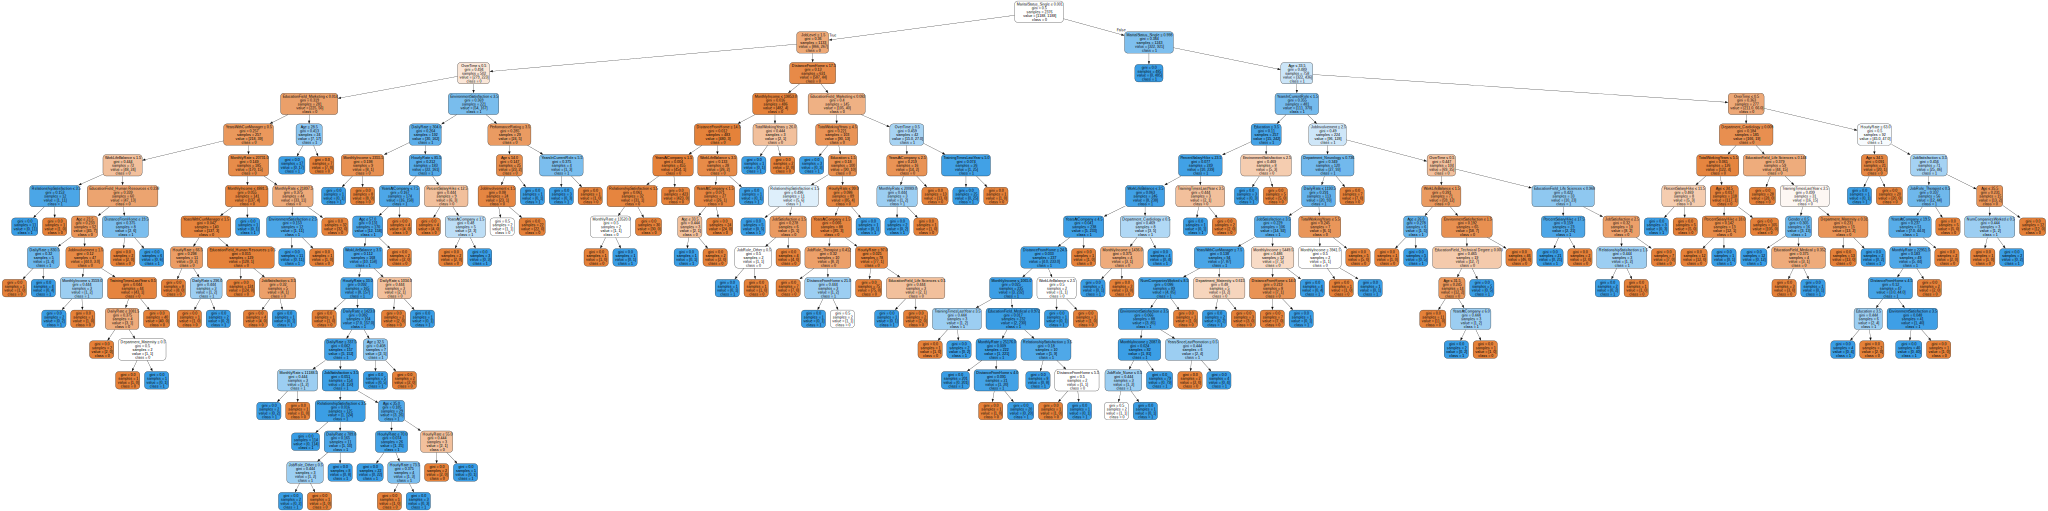

In [7]:
# Visualize the decision tree
dot_data = Source(export_graphviz(CART, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True))
display(SVG(dot_data.pipe(format='svg')))

In [8]:
# print out the most important features and their values
feature_importances = CART.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                            Feature  Importance
41             MaritalStatus_Single    0.345497
0                               Age    0.112603
14                         OverTime    0.104203
9                          JobLevel    0.066176
5           EnvironmentSatisfaction    0.029576
22               YearsInCurrentRole    0.028950
30         EducationField_Marketing    0.024917
7                        HourlyRate    0.022646
3                  DistanceFromHome    0.022093
12                      MonthlyRate    0.021162
8                    JobInvolvement    0.020817
2                         DailyRate    0.020010
20                  WorkLifeBalance    0.019042
10                  JobSatisfaction    0.016999
21                   YearsAtCompany    0.015989
29     EducationField_Life Sciences    0.012919
11                    MonthlyIncome    0.011393
15                PercentSalaryHike    0.011166
4                         Education    0.010864
19            TrainingTimesLastYear    0

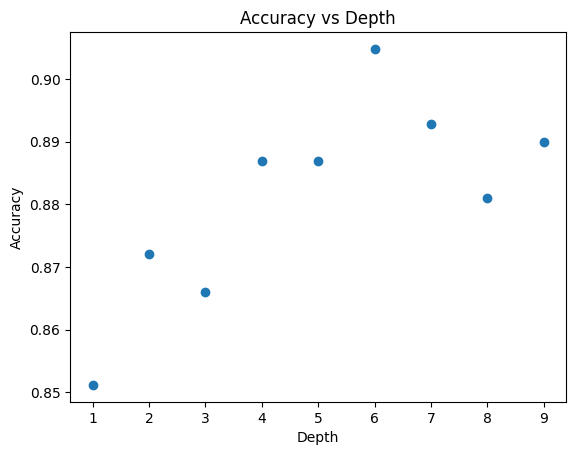

The best performing depth is: 6


In [9]:
depths = range(1, 10)
accuracy = pd.Series(index=depths, dtype=float)

for depth in depths:
  CART.set_params(max_depth=depth)
  CART.fit(X_train, y_train)
  accuracy[depth] = CART.score(X_test, y_test)

plt.scatter(accuracy.index, accuracy.values)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.show()

# The best performing depth
print(f"The best performing depth is: {accuracy.idxmax()}")

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 50)
}

# Perform Search
random_search = RandomizedSearchCV(
    estimator= CART,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=1,
    n_jobs=-1,
    return_train_score=True)

# Fit the model
random_search.fit(X_train, y_train)

# Extract the best score and the best hyperparameters
best_score_dt = random_search.best_score_
best_params = random_search.best_params_

# Print the best score and hyperparameters
print(f"Best performance using decision tree is {best_score_dt:.9f} with a max depth of {best_params['max_depth']} and a min samples split of {best_params['min_samples_split']}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_s

##Support Vector Machine Model Training
1. Unbalance dataset: Use class_weight to account for class inbalance.
2. SVM with different Kernels then compare their performance metrics.


In [11]:
X_train_resampled.head(10)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,1,528,8,4,3,0,100,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,31,1,1463,23,3,2,0,64,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,1,933,9,4,3,0,94,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,22,1,253,11,3,1,1,43,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23,1,373,1,2,4,0,47,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,27,0,443,3,3,4,0,50,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,28,0,280,1,2,3,0,43,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,32,1,906,7,3,4,0,91,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,35,1,556,23,2,2,0,50,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,31,1,691,5,4,3,0,86,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
# Import classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Selecting Parameters
Start by using grid search to find optimized parameters for our model.

In [13]:
# Define the SVM instance
svm = SVC()

In [14]:
# Run Grid Search with parameters to find most optimial combination of parameters

# Pipeline with scaling and SVM
pipeline = make_pipeline(StandardScaler(), SVC())

# Define hyperparameter grid
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto', 0.1, 1]}

# GridSearch for best parameters
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_resampled, y_train_resampled)

print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


The inital parameters of the grid search was populated based on convention and research of parameter values for kernel type, C value, and gamma. Now we are able to create an instance of the SVC class with the following best parameters.

In [30]:
# Define SVM instance
# svm = SVC(C=0.1, gamma='scale', kernel='rbf')
svm = grid.best_estimator_


# Train the model
svm.fit(X_train_resampled, y_train_resampled)

# Make a prediction
y_pred = svm.predict(X_test)


Given we trained and fit our model, we will now use the general performance metric evaluations.

In [31]:
# Import performance metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
# Performance Metrics

# Cross Validation Scores
print(f"Cross Validation Scores: {cross_val_score(svm, X_train_resampled, y_train_resampled, cv=5)}")

# Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross Validation Scores: [0.92016807 0.99157895 0.98736842 0.99789474 0.99789474]
Accuracy: 0.8779761904761905
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       289
           1       0.69      0.23      0.35        47

    accuracy                           0.88       336
   macro avg       0.79      0.61      0.64       336
weighted avg       0.86      0.88      0.85       336



Here, while the accuracy is low, I'm focusing on high accuracy on recall on class 1 (quitters) since we rather identify the most quitters possible (improving recall for Class 1).

## Feature Importance


In [33]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Get feature names
feature_names = X_test.columns

# Print top features with names
for i in importance.argsort()[::-1]:
    print(f"Feature {feature_names[i]}: {importance[i]:.4f}")

Feature OverTime: 0.0104
Feature MaritalStatus_Divorced: 0.0095
Feature JobInvolvement: 0.0077
Feature TrainingTimesLastYear: 0.0071
Feature EducationField_Marketing: 0.0054
Feature MaritalStatus_Single: 0.0042
Feature EnvironmentSatisfaction: 0.0039
Feature MaritalStatus_Married: 0.0039
Feature PerformanceRating: 0.0033
Feature YearsSinceLastPromotion: 0.0033
Feature BusinessTravel: 0.0030
Feature Education: 0.0027
Feature PercentSalaryHike: 0.0027
Feature EducationField_Medical: 0.0027
Feature YearsWithCurrManager: 0.0024
Feature WorkLifeBalance: 0.0024
Feature MonthlyIncome: 0.0021
Feature YearsInCurrentRole: 0.0021
Feature HourlyRate: 0.0021
Feature JobRole_Therapist: 0.0018
Feature JobSatisfaction: 0.0018
Feature EducationField_Human Resources: 0.0009
Feature TotalWorkingYears: 0.0009
Feature Department_Cardiology: 0.0006
Feature YearsAtCompany: 0.0006
Feature JobRole_Admin: 0.0006
Feature EducationField_Life Sciences: 0.0003
Feature JobRole_Nurse: 0.0003
Feature DistanceFromHome:

In [35]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Print top features
for i in importance.argsort()[::-1]:
    print(f"Feature {i}: {importance[i]:.4f}")

Feature 14: 0.0104
Feature 39: 0.0095
Feature 8: 0.0077
Feature 19: 0.0071
Feature 30: 0.0054
Feature 41: 0.0042
Feature 5: 0.0039
Feature 40: 0.0039
Feature 16: 0.0033
Feature 23: 0.0033
Feature 1: 0.0030
Feature 4: 0.0027
Feature 15: 0.0027
Feature 31: 0.0027
Feature 24: 0.0024
Feature 20: 0.0024
Feature 11: 0.0021
Feature 22: 0.0021
Feature 7: 0.0021
Feature 38: 0.0018
Feature 10: 0.0018
Feature 28: 0.0009
Feature 18: 0.0009
Feature 25: 0.0006
Feature 21: 0.0006
Feature 34: 0.0006
Feature 29: 0.0003
Feature 36: 0.0003
Feature 3: 0.0000
Feature 35: 0.0000
Feature 0: -0.0003
Feature 6: -0.0006
Feature 37: -0.0006
Feature 9: -0.0009
Feature 33: -0.0009
Feature 27: -0.0009
Feature 13: -0.0012
Feature 26: -0.0015
Feature 32: -0.0015
Feature 12: -0.0045
Feature 17: -0.0057
Feature 2: -0.0065


## ROC Curve for all models
- After we assemble all of the models, we should have a ROC curve with all of them,

ROC-AUC Score: 0.82


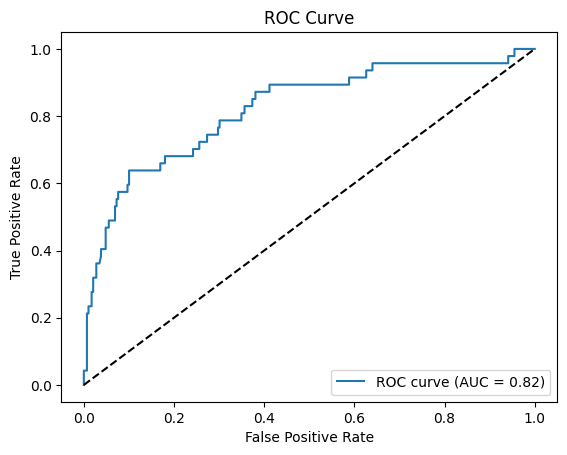

In [36]:
# ROC Curve
y_score = svm.decision_function(X_test)  # Decision scores for SVM
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve compared to the baseline and other models
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
y_score

array([-1.73789099e+00,  7.38373651e-01,  1.09554273e+00,  7.58483620e-01,
        1.14747324e+00, -2.98274777e-02, -1.37005392e+00,  4.30914966e-01,
        8.38020717e-01,  5.67518406e-01,  7.77572951e-01,  1.05986389e+00,
       -6.28682272e-01,  7.55218096e-01, -1.37839505e+00,  8.40392925e-01,
        2.46206772e-01, -1.63504651e+00,  7.91753658e-01, -3.34623993e-01,
        1.08955917e+00,  8.82332459e-01,  7.51911803e-01, -1.32198982e+00,
       -1.19286898e+00, -1.23931365e+00,  3.12440437e-01, -1.19232495e+00,
        1.03972272e+00,  9.06253649e-01, -1.45979568e+00,  8.48725161e-01,
        2.49950005e-01, -1.31906252e+00, -5.84170257e-01, -6.55693024e-01,
       -1.59981302e+00, -1.68879446e+00,  8.77587836e-01,  1.35589949e+00,
        2.09186733e-01,  1.04110421e-01, -1.26371071e+00, -1.70812364e+00,
        9.27526177e-01,  9.75194968e-01,  5.83346247e-01, -1.42583392e+00,
        8.01763317e-01, -3.09314146e-02, -3.51648722e-01,  7.74606576e-01,
       -5.28846595e-01,  

In [24]:
# print out the most important features and their values
# feature_importances = svm.feature_importances_
# feature_names = X_train_resampled.columns
# feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# print(feature_importances)